### Titanic Python Exercise

Work book for first programming exercise


In [17]:
print ("Welcome to the first programming exercise")

Welcome to the first programming exercise


891
0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


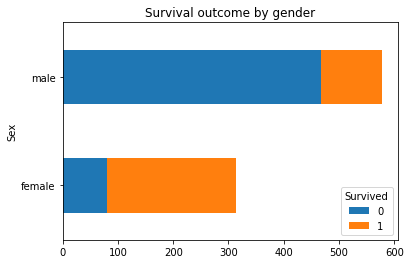

In [70]:
# EDA of survival outcome based on gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#print first few rows
#train.head()
#test.head()

#train.describe() #summary descriptive stats
#list(train) #list the headings

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

# Check out what data types are included
#train.dtypes

#check dataset for duplicate passenger names
total_pass = len(np.unique(train["Name"]))
print (total_pass)

# Explore the data a bit
survived = train["Survived"].value_counts() 
survived_ratio = (survived / total_pass)
print (survived)
print (survived_ratio)

# Generate stacked bar chart showing survival outcome and gender
train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Survival outcome by gender')
plt.show()

In [1]:
# Predict survival outcome based on gender
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
train = pd.read_csv("train.csv")

# add a column
train['ModelPrediction'] = 0

# assign prediction for females = survived
train.loc[train['Sex'] == "female", 'ModelPrediction'] = 1

#calculate prediction outcome
sum(train.ModelPrediction == train.Survived) / train.shape[0] #shape counts the number of rows in the dataset

0.78675645342312006

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64
Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


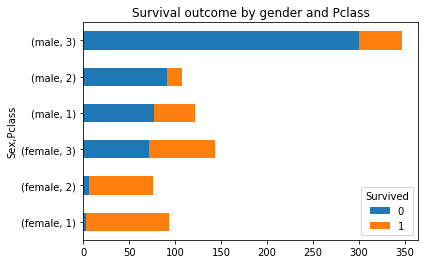

Sex                female      male
Survived Pclass                    
0        1       0.003367  0.086420
         2       0.006734  0.102132
         3       0.080808  0.336700
1        1       0.102132  0.050505
         2       0.078563  0.019080
         3       0.080808  0.052750

In [72]:
# EDA of survival outcome based on Pclass and gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

#calculate some stats to explore
total_pass = len(np.unique(train["Name"]))
survived = train["Survived"].value_counts() 
survived_ratio = (survived / total_pass)
print (survived)
print (survived_ratio)

print (train.groupby(['Pclass','Survived']).PassengerId.count())

#pd.crosstab('Pclass',['Survived'], rownames=['Pclass'], colnames=['Survived'])
#pd.pivot_table(train, values = ["PassengerId"], index=['Pclass', 'Survived'], columns=['Survived'])

# Generate stacked bar chart showing survival outcome and gender
train.groupby(['Sex', 'Pclass', 'Survived']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Survival outcome by gender and Pclass')
plt.show()

# Generate crosstab
pd.crosstab([train.Survived, train.Pclass], train.Sex, normalize=True)

0.799102132435


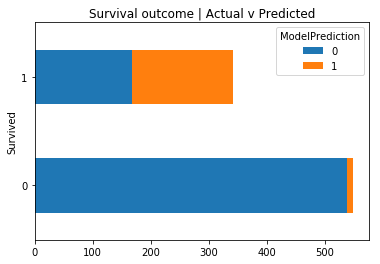

ModelPrediction,0,1,All
Survived,,,
0,538,11,549
1,168,174,342
All,706,185,891


In [73]:
# Predict survival outcome based on gender and Pclass
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
train = pd.read_csv("train.csv")

# add a column and set intial values
train['ModelPrediction'] = 0

# assign prediction for females = survived, unless travelling in Pclass = 3 | all males under 18 in PClass 1,2
train.loc[train['Sex'] == "female", 'ModelPrediction'] = 1
train.loc[train['Pclass'] == 3, 'ModelPrediction'] = 0
#train.loc[train['Age'] < 1, 'ModelPrediction'] = 1
train.loc[((train['Pclass'] == 1) | (train['Pclass'] == 2)) & (train['Sex'] == "male") & (train.Age < 18), 'ModelPrediction'] = 1

#calculate prediction outcome
print(sum(train.ModelPrediction == train.Survived) / train.shape[0]) #shape counts the number of rows in the dataset

# Generate  bar chart showing actual v predicted survival outcome
train.groupby(['Survived', 'ModelPrediction']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Survival outcome | Actual v Predicted')
plt.show()

# Generate crosstab
pd.crosstab(train.Survived, train.ModelPrediction, margins=True)



In [31]:
# EDA of survival outcome based on gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

#check dataset for duplicate passenger names
#total_pass = len(np.unique(train["Name"]))
#print (total_pass)

# Explore the data a bit
#survived = train["Survived"].value_counts() 
#survived_ratio = (survived / total_pass)
#print (survived)
#print (survived_ratio)

# Generate stacked bar chart showing survival outcome and gender
#train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
#plt.title('Survival outcome by gender')
#plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
# EDA of survival outcome based on gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

# EDA of survival outcome based on gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

# EDA of survival outcome based on gender
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Convert Pclass and Survived to objects in the training data
train['Pclass'] = train['Pclass'].astype(object)
train['Survived'] = train['Survived'].astype(object)

# Generate crosstab
pd.crosstab(train.Age, [train.Sex, train.Survived, train.Pclass], margins=True)

# Generate stacked bar chart showing survival outcome and gender
#train.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
#plt.title('Survival outcome by gender')
#plt.show()

Sex      female                    male                       All
Survived      0          1            0            1             
Pclass        1  2   3   1   2   3    1   2    3   1   2   3     
Age                                                              
0.42          0  0   0   0   0   0    0   0    0   0   0   1    1
0.67          0  0   0   0   0   0    0   0    0   0   1   0    1
0.75          0  0   0   0   0   2    0   0    0   0   0   0    2
0.83          0  0   0   0   0   0    0   0    0   0   2   0    2
0.92          0  0   0   0   0   0    0   0    0   1   0   0    1
1.0           0  0   0   0   0   2    0   0    2   0   2   1    7
2.0           1  0   3   0   1   1    0   0    3   0   1   0   10
3.0           0  0   1   0   1   0    0   0    0   0   2   2    6
4.0           0  0   0   0   2   3    0   0    3   1   0   1   10
5.0           0  0   0   0   1   3    0   0    0   0   0   0    4
6.0           0  0   1   0   1   0    0   0    0   0   0   1    3
7.0           0  0   0   0   1   0    0   0    2   0   0   0    3
8.0           0  0   1   0   1   0    0   0    1   0   1   0    4
9.0           0  0   4   0   0   0    0   0    2   0   0   2    8
10.0          0  0   1   0   0   0    0   0    1   0   0   0    2
11.0          0  0   1   0   0   0    0   0    2   1   0   0    4
12.0          0  0   0   0   0   0    0   0    0   0   0   1    1
13.0          0  0   0   0   1   1    0   0    0   0   0   0    2
14.0          0  0   1   1   1   1    0   0    2   0   0   0    6
14.5          0  0   1   0   0   0    0   0    0   0   0   0    1
15.0          0  0   0   1   0   3    0   0    1   0   0   0    5
16.0          0  0   1   3   0   2    0   2    8   0   0   1   17
17.0          0  0   1   2   2   1    0   0    6   1   0   0   13
18.0          0  0   5   3   2   3    1   4    7   0   0   1   26
19.0          0  0   0   3   2   2    2   3   11   0   1   1   25
20.0          0  0   2   0   0   0    0   0   10   0   0   3   15
20.5          0  0   0   0   0   0    0   0    1   0   0   0    1
21.0          0  0   3   2   1   1    1   3   12   0   0   1   24
22.0          0  0   2   4   2   4    1   0   13   0   0   1   27
23.0          0  0   1   2   1   1    0   6    3   1   0   0   15
...         ... ..  ..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ...
45.0          0  0   3   1   2   0    3   0    1   1   0   1   12
45.5          0  0   0   0   0   0    1   0    1   0   0   0    2
46.0          0  0   0   0   0   0    2   1    0   0   0   0    3
47.0          0  0   1   1   0   0    4   1    2   0   0   0    9
48.0          0  0   1   2   1   0    0   1    1   3   0   0    9
49.0          0  0   0   2   0   0    1   0    1   2   0   0    6
50.0          1  0   0   1   3   0    2   1    1   1   0   0   10
51.0          0  0   0   1   0   0    1   1    3   1   0   0    7
52.0          0  0   0   2   0   0    1   2    0   1   0   0    6
53.0          0  0   0   1   0   0    0   0    0   0   0   0    1
54.0          0  0   0   2   1   0    2   3    0   0   0   0    8
55.0          0  0   0   0   1   0    1   0    0   0   0   0    2
55.5          0  0   0   0   0   0    0   0    1   0   0   0    1
56.0          0  0   0   1   0   0    2   0    0   1   0   0    4
57.0          0  1   0   0   0   0    0   1    0   0   0   0    2
58.0          0  0   0   3   0   0    2   0    0   0   0   0    5
59.0          0  0   0   0   0   0    0   1    1   0   0   0    2
60.0          0  0   0   1   0   0    1   1    0   1   0   0    4
61.0          0  0   0   0   0   0    2   0    1   0   0   0    3
62.0          0  0   0   1   0   0    2   0    0   0   1   0    4
63.0          0  0   0   1   0   1    0   0    0   0   0   0    2
64.0          0  0   0   0   0   0    2   0    0   0   0   0    2
65.0          0  0   0   0   0   0    2   0    1   0   0   0    3
66.0          0  0   0   0   0   0    0   1    0   0   0   0    1
70.0          0  0   0   0   0   0    1   1    0   0   0   0    2
70.5          0  0   0   0   0   0    0 